# Assignment 2: Data Modelling
***
<b> Group: 10</b>
<br>
<b> Student Name: Nguyen Dang Huynh Chau (S3777214)</b>
<br>
<b> Student Name: Tran Ngoc Anh Thu (S3879312)</b>
<br>
<b> Student Name: Ho Le Minh Thach (S3879312)</b>
<br>
<b> Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard. (Safe to buy, ideal to buy and dangerous to buy)

# Task 1: Data Preparation
***

# Part 1: Importing Necessary Libraries and datasets
***
<a id="import_libraries**"></a>
## 1a. Loading libraries

Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate. 

In [1]:
# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#for date time data types
import datetime
#For Encoding
!pip install category_encoders --quiet
import category_encoders as ce
#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10
import seaborn as sb

#Libraries for plotting
import seaborn as sns #seaborn for catgory columns
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

#disable this new warning which is The SettingWithCopyWarning was created to flag potentially confusing "chained"
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.style as style
# import calendar for getting the month and week names
import calendar

## 1b. Data Retrieving
***

In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True". In order to have a look on all columns carefully, using the set_option('display.max_columns', None) in the pandas, all the columns will be shown.

In [2]:
# import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
#data is imported by "read_csv() function of pandas"
df = pd.read_csv('Data/VN_housing_dataset.csv', delimiter=',', skipinitialspace = True, index_col=0)

#set to show all columns
pd.set_option('display.max_columns', None)


#Replace extra-whitspaces with regex by using function replace in pandas
df = df.replace({"^\s*|\s*$":""}, regex=True) 

First of all, some of the columns may have typo or extra-whitespaces so that using the df.columns to print all the columns and strip the extra-whitespaces 

In [3]:
df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

## 1c. A Glimpse of the Datasets. 
<a id="glimpse"></a>
***

In [4]:
%%time
df.sample(5)

CPU times: user 2.74 ms, sys: 1.71 ms, total: 4.45 ms
Wall time: 4.67 ms


,Ngày,Địachỉ,Quận,Huyện,Loạihìnhnhàở,Giấytờpháplý,Sốtầng,Sốphòngngủ,Diệntích,Dài,Rộng,Giá/m2
59706.0,2020-06-24,"Đường Tân Ấp, Phường Phúc Xá, Quận Ba Đình, Hà...",Quận Ba Đình,Phường Phúc Xá,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,21 m²,5 m,4 m,"66,67 triệu/m²"
31022.0,2020-07-17,"Đường Khương Đình, Phường Khương Đình, Quận Th...",Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,37 m²,NaN,NaN,"81,08 triệu/m²"
57940.0,2020-06-25,"Đường Phú Diễn, Phường Phú Diễn, Quận Bắc Từ L...",Quận Bắc Từ Liêm,Phường Phú Diễn,"Nhà ngõ, hẻm",Đã có sổ,4,2 phòng,30 m²,NaN,NaN,80 triệu/m²
80613.0,2020-06-07,"Đường Ngõ Quỳnh, Phường Bạch Mai, Quận Hai Bà ...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà ngõ, hẻm",Đã có sổ,3,3 phòng,30 m²,NaN,NaN,110 triệu/m²
27649.0,2020-07-19,"Đường Bùi Xương Trạch, Phường Khương Đình, Quậ...",Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,50 m²,NaN,NaN,140 triệu/m²


This is a sample of dataset. Lets find out a bit more about the dataset. 

In [5]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(82497, 12)
<class 'pandas.core.frame.DataFrame'>
Float64Index: 82497 entries, 0.0 to nan
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ngày          82496 non-null  object
 1   Địachỉ        82449 non-null  object
 2   Quận          82495 non-null  object
 3   Huyện         82449 non-null  object
 4   Loạihìnhnhàở  82465 non-null  object
 5   Giấytờpháplý  53610 non-null  object
 6   Sốtầng        36399 non-null  object
 7   Sốphòngngủ    82458 non-null  object
 8   Diệntích      82495 non-null  object
 9   Dài           19827 non-null  object
 10  Rộng          35445 non-null  object
 11  Giá/m2        82484 non-null  object
dtypes: object(12)
memory usage: 8.2+ MB
None


 ## 1d. About This Dataset
***

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...
***
**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Address**
   > - **Housing_type**
   > - **Legal_documents**
   > - **Number_of_room**
***
**Numeric:**
- **Discrete**
  >  - **Number_of_floor**
  >  - **Area**
  >  - **Length**
  >  - **Width**  
  >  - **Price_per_metersquare**

***
**Date/time:**
- **Date**(Nominal variable)

# Part 2: Overview and Cleaning the Data
<a id="cleaningthedata"></a>
***
## 2a. Rename columns
Since these columns are in Vietnamese so change their names into English in order to deal with them more straightforward in later

In [6]:
df = df.rename(columns={'Ngày': 'Date', 'Địachỉ': 'Address', 'Quận': 'District', 'Huyện': 'Ward',
                        'Loạihìnhnhàở': 'Housing_type',  'Giấytờpháplý': 'Legal_documents', 
                        'Sốtầng': 'Number_of_floor', 'Sốphòngngủ': 'Number_of_room', 'Diệntích': 'Area', 
                        'Dài': 'Length', 'Rộng': 'Width', 'Giá/m2': 'Price_per_metersquare'})

## 2b. Overview

Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

In [7]:
## saving passenger id in advance in order to submit later. 
Price_per_metersquare = df.Price_per_metersquare

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 82497 entries, 0.0 to nan
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   82496 non-null  object
 1   Address                82449 non-null  object
 2   District               82495 non-null  object
 3   Ward                   82449 non-null  object
 4   Housing_type           82465 non-null  object
 5   Legal_documents        53610 non-null  object
 6   Number_of_floor        36399 non-null  object
 7   Number_of_room         82458 non-null  object
 8   Area                   82495 non-null  object
 9   Length                 19827 non-null  object
 10  Width                  35445 non-null  object
 11  Price_per_metersquare  82484 non-null  object
dtypes: object(12)
memory usage: 8.2+ MB
None


It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...
* We may have missing values in our features.
* We may have categorical features. 
* We may have alphanumerical or/and text features. 


## 2c. Dealing with data types
***

In [8]:
df["Area"] = df["Area"].str.replace("\sm²", "", regex=True)
df["Length"] = df["Length"].str.replace("\sm", "", regex=True)
df["Width"] = df["Length"].str.replace("\sm", "", regex=True)
df["Price_per_metersquare"] = df["Price_per_metersquare"].str.replace(".", "", regex=True)
df["Price_per_metersquare"] = df["Price_per_metersquare"].str.replace("\striệu/m²", "", regex=True)
df["Price_per_metersquare"] = df["Price_per_metersquare"].str.replace(",", ".", regex=True)
df["Price_per_metersquare"] = df["Price_per_metersquare"].str.replace("\sđ/m²", "", regex=True)
df["Price_per_metersquare"] = df["Price_per_metersquare"].str.replace("\stỷ/m²", "000", regex=True)
df["Number_of_floor"] = df["Number_of_floor"].str.replace("Nhiều hơn 10", "11", regex=True)

In [9]:
df['Date'] = df['Date'].astype('string')
df['Address'] = df['Address'].astype('string')
df['Housing_type'] = df['Housing_type'].astype('string')
df['District'] = df['District'].astype('string')
df['Ward'] = df['Ward'].astype('string')
df['Legal_documents'] = df['Legal_documents'].astype('string')
#They are expected to be number values, let's check
df["Number_of_floor"]= df["Number_of_floor"].fillna(0).astype(int)
df['Number_of_room'] = df['Number_of_room'].astype('string')
df['Area'] = df['Area'].astype('float')
df['Length'] = df['Length'].astype('float')
df['Width'] = df['Width'].astype('float')
df['Price_per_metersquare'] = df['Price_per_metersquare'].astype('float')

## Recheck data type

In [10]:
df.dtypes

Date                      string
Address                   string
District                  string
Ward                      string
Housing_type              string
Legal_documents           string
Number_of_floor            int64
Number_of_room            string
Area                     float64
Length                   float64
Width                    float64
Price_per_metersquare    float64
dtype: object

## 2d. Dealing with Missing values
***
**Missing values in dataset.**

In [11]:
df.isnull().sum()

Date                         1
Address                     48
District                     2
Ward                        48
Housing_type                32
Legal_documents          28887
Number_of_floor              0
Number_of_room              39
Area                         2
Length                   62670
Width                    62670
Price_per_metersquare       13
dtype: int64

### Date,  District, Area Feature

In [12]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [13]:
df = df[df['Date'].notna()]
df = df[df['District'].notna()]
df = df[df['Area'].notna()]

### Other features

In [14]:
df['Price_per_metersquare'] = df.groupby('District')['Price_per_metersquare'].apply(lambda x: x.fillna(x.median()))
# df['Address'] = df.groupby('District')['Address'].apply(lambda x: x.fillna(x.median()))
df['Address'] = df.groupby('District').Address.bfill()
df['Ward'] = df.groupby('District').Ward.bfill()
df['Housing_type'] = df.groupby('District').Housing_type.bfill()
df['Legal_documents'].fillna("Giấy tờ khác", inplace=True)
df['Number_of_room'].fillna("4 phòng", inplace=True)
df['Length'] = df.groupby('Area').Length.bfill()
df['Length'].fillna((df['Length'].mean()), inplace=True)
df['Width'] = df.groupby('Area').Width.bfill()
df['Width'].fillna((df['Width'].mean()), inplace=True)

## 2e. Translate all values to English
***
Since all the values are Vietnamese so it is important to translate all of them in English

<b> District

In [15]:
df['District'].value_counts()

Quận Đống Đa         13991
Quận Thanh Xuân      12959
Quận Hoàng Mai       11164
Quận Hai Bà Trưng    10578
Quận Hà Đông          7833
Quận Cầu Giấy         6607
Quận Ba Đình          4692
Quận Long Biên        4217
Quận Nam Từ Liêm      3188
Quận Tây Hồ           2950
Quận Bắc Từ Liêm      1536
Huyện Thanh Trì       1201
Quận Hoàn Kiếm         528
Huyện Hoài Đức         454
Huyện Gia Lâm          271
Huyện Đông Anh          97
Huyện Thanh Oai         51
Huyện Sóc Sơn           40
Huyện Quốc Oai          24
Huyện Đan Phượng        23
Huyện Chương Mỹ         20
Thị xã Sơn Tây          19
Huyện Thường Tín        16
Huyện Thạch Thất        14
Huyện Mê Linh           11
Huyện Ba Vì              6
Huyện Phúc Thọ           2
Huyện Mỹ Đức             1
Huyện Phú Xuyên          1
Name: District, dtype: Int64

In [16]:
df['District'].replace(to_replace =["Quận Đống Đa"], value ="Dong Da District", inplace = True)
df['District'].replace(to_replace =["Quận Thanh Xuân"], value ="Thanh Xuan District", inplace = True)
df['District'].replace(to_replace =["Quận Hoàng Mai"], value ="Hoang Mai District", inplace = True)
df['District'].replace(to_replace =["Quận Hai Bà Trưng"], value ="Hai Ba Trung District", inplace = True)
df['District'].replace(to_replace =["Quận Hà Đông"], value ="Ha Dong District", inplace = True)
df['District'].replace(to_replace =["Quận Cầu Giấy"], value ="Cau Giay District", inplace = True)
df['District'].replace(to_replace =["Quận Ba Đình"], value ="Ba Dinh District", inplace = True)
df['District'].replace(to_replace =["Quận Long Biên"], value ="Long Bien District", inplace = True)
df['District'].replace(to_replace =["Quận Nam Từ Liêm"], value ="Nam Tu Liem District", inplace = True)
df['District'].replace(to_replace =["Quận Tây Hồ"], value ="Tay Ho District", inplace = True)
df['District'].replace(to_replace =["Quận Bắc Từ Liêm"], value ="Bac Tu Liem District", inplace = True)
df['District'].replace(to_replace =["Huyện Thanh Trì"], value ="Thanh Tri District", inplace = True)
df['District'].replace(to_replace =["Quận Hoàn Kiếm"], value ="Hoan Kiem District", inplace = True)
df['District'].replace(to_replace =["Huyện Hoài Đức"], value ="Hoai Duc District", inplace = True)
df['District'].replace(to_replace =["Huyện Gia Lâm"], value ="Gia Lam District", inplace = True)
df['District'].replace(to_replace =["Huyện Đông Anh"], value ="Dong Anh District", inplace = True)
df['District'].replace(to_replace =["Huyện Thanh Oai"], value ="Thanh Oai District", inplace = True)
df['District'].replace(to_replace =["Huyện Sóc Sơn"], value ="Soc Son District", inplace = True)
df['District'].replace(to_replace =["Huyện Quốc Oai"], value ="Quoc Oai District", inplace = True)
df['District'].replace(to_replace =["Huyện Đan Phượng"], value ="Dan Phuong District", inplace = True)
df['District'].replace(to_replace =["Huyện Chương Mỹ"], value ="Chuong My District", inplace = True)
df['District'].replace(to_replace =["Thị xã Sơn Tây"], value ="Son Tay Town", inplace = True)
df['District'].replace(to_replace =["Huyện Thường Tín"], value ="Thuong Tin District", inplace = True)
df['District'].replace(to_replace =["Huyện Thạch Thất"], value ="Thach That District", inplace = True)
df['District'].replace(to_replace =["Huyện Mê Linh"], value ="Me Linh District", inplace = True)
df['District'].replace(to_replace =["Huyện Ba Vì"], value ="Ba Vi District", inplace = True)
df['District'].replace(to_replace =["Huyện Phúc Thọ"], value ="Phuc Tho District", inplace = True)
df['District'].replace(to_replace =["Huyện Phú Xuyên"], value ="Phu Xuyen District", inplace = True)
df['District'].replace(to_replace =["Huyện Mỹ Đức"], value ="My Duc District", inplace = True)

<b> Housing_type

In [17]:
categories = list(df['Housing_type'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Nhà ngõ, hẻm
Nhà mặt phố, mặt tiền
Nhà phố liền kề
Nhà biệt thự


In [18]:
df['Housing_type'].replace(to_replace =["Nhà ngõ, hẻm"], value ="Lane house", inplace = True)
df['Housing_type'].replace(to_replace =["Nhà mặt phố, mặt tiền"], value ="Frontage", inplace = True)
df['Housing_type'].replace(to_replace =["Nhà phố liền kề"], value ="Adjacent townhouses", inplace = True)
df['Housing_type'].replace(to_replace =["Nhà biệt thự"], value ="Villa house", inplace = True)   

<b> Legal_documents

In [19]:
categories = list(df['Legal_documents'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Đã có sổ
Giấy tờ khác
Đang chờ sổ


In [20]:
df['Legal_documents'].replace(to_replace =["Đã có sổ"], value ="Already had registration book", inplace = True)
df['Legal_documents'].replace(to_replace =["Giấy tờ khác"], value ="Other", inplace = True)
df['Legal_documents'].replace(to_replace =["Đang chờ sổ"], value ="Waiting for registration book", inplace = True)

<b> Number_of_room

In [21]:
categories = list(df['Number_of_room'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

4 phòng
3 phòng
5 phòng
2 phòng
6 phòng
1 phòng
8 phòng
nhiều hơn 10 phòng
7 phòng
10 phòng
9 phòng


In [22]:
df['Number_of_room'].replace(to_replace =["1 phòng"], value ="1 room", inplace = True)
df['Number_of_room'].replace(to_replace =["2 phòng"], value ="2 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["3 phòng"], value ="3 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["4 phòng"], value ="4 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["5 phòng"], value ="5 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["6 phòng"], value ="6 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["7 phòng"], value ="7 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["8 phòng"], value ="8 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["9 phòng"], value ="9 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["10 phòng"], value ="10 rooms", inplace = True)
df['Number_of_room'].replace(to_replace =["nhiều hơn 10 phòng"], value ="more than rooms", inplace = True)

## 2g. Dealing with outliers
***
Although, there are maybe some outliers in some columns which are "Area", "Length", "Width" and "Price_per_metersquare" column, in this scenario, they should not be deleted since the target of this report is to find which housing area are safe, ideal or dangerous to buy

# Part 3. Visualization and Feature Relations
***
Before we dive into finding relations between independent variables and our dependent variable(Price_per_metersquare), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:** 

- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- In the same street, the lane house should be cheeper than the Frontage or Villa house.    


Now, let's see how the features are related to each other by creating some visualizations. 

## Some domain knowledge:
***
1. **Housing_type**: 
> In the same street, the lane house should be cheeper than the Frontage or Villa house, but in some cases they have more advantages since the rules for building them is not as restricted as the Frontage or Villa house.

2. **Number of Floor**: 
- **The Land lot with an area of 30m2 to less than 40m2** : With a facade width greater than 3m, a depth of more than 5m compared to the construction boundary, it is allowed to build no more than 4 floors + 1 tum (total height < 16m).
- **The Land lot with an area of 40m2 - 50m2** : If the width of the facade is over 3m and less than 8m, the depth compared to the construction limit is greater than 5m, it is allowed to build no more than 5 floors + 1 tum, or have a heat resistant roof (total height of the house < 20m).
- **The Land Lot with an area of over 50m2**: The width of the facade is greater than 8m, the depth is greater than 5m compared to the construction boundary or the construction works on both sides of the road in the restricted development planning area, the 6-storey house may be built.

3. **Legal_documents**:
In Vietnam, the House ownership certificate is used for transfer of land use right, however, it is still possible in transfering in some cases
- Having a Certificate, except for the case specified in Clause 3, Article 186 and the case of inheritance specified in Clause 1, Article 168 of this Law.

- Undisputed land.

- The land use right is not distrained to secure judgment enforcement.

- During the land use term.

However, it is **NOT SAFE** to use these plots since the land users can just only use temporarily the land in its current state until the State recovers the land, and the condition is extremely overwhelmed and restricted.

4. **Area, Length and Width** :
According to The latest report on the conditions for the separation of plots in Hanoi in 2021, the plot having area less than 30m^2 can still be sold but it has to follow the condition:

According to Clause 1, Article 188 of the 2013 Land Law, when transferring land use rights (which people often call land purchase and sale), the land user must meet the following conditions:

- Having Certificate, except 02 cases;

- Undisputed land;

- The land use right is not distrained to secure judgment enforcement;

- During the land use period.

Moreover in order to build a house, the plot must be calculated the density for the plot with the formula

Density (%) = 90 + (85-90) / (100-75) * ( <b> Area </b> - 75)
***
For example, your lot area is 83m2. Your house is in the inner city. The construction density is calculated as follows:

Density (%) = 90 + (85-90) / (100-75) * (83-75) = 88.4%

Thus, the land area is 83m2, the area allowed to build: 83 x 88.4% = 73.37m2. The rest is not built as a setback and atrium (leave space) to ensure density.
***

5. **Price_per_metersquare** : 
- Arcoding to Tuoitre, the Price_per_metersquare is in the range from 495000 VND/m2 to 87.920.000 VND/m2 is safe and ideal for consume
- Having same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts
***

***So that the safety condition for the customers is:** 
- Plot has number of floor is less than 8. (*)
- Already had registration book.
- The Area is higher than 30m^2. (*)
- Price is in the range from 495000 VND/m2 to 87920000 VND/m2.
- Same housing type, the plot in urban districts in Hanoi should not be lower than the suburban districts.
- In the same street, the lane house should be cheaper than the Frontage or Villa house.

(*): Must go together otherwise the buildings have high probability to fall.

***Reference:*** 
- The latest report on the conditions for the separation of plots in Hanoi in 2021: 
> https://danviet.vn/dieu-kien-tach-thua-tai-ha-noi-nam-2021-moi-nhat-2021032906255103.htm 
- Height Limitation:
> https://noithatmyhouse.com/quy-dinh-chieu-cao-xay-dung-nha-o/
- Legal Document:
> https://luatvietnam.vn/dat-dai-nha-o/su-dung-dat-khong-co-so-do-567-27503-article.html
- Report on limited area for buy:
> https://luatvietnam.vn/dat-dai-nha-o/dat-nho-hon-dien-tich-toi-thieu-co-duoc-phep-mua-ban-567-22530-article.html
- Price of housing plot in Hanoi:
> https://tuoitre.vn/gia-dat-o-tai-ha-noi-cao-nhat-187-92-trieu-met-vuong-20191226102403571.htm
- Price of housing plot in Hanoi::
> https://laodong.vn/bat-dong-san/dat-hon-vang-nhung-tuyen-pho-giua-long-ha-noi-790770.ldo

## Unsafety Example
***

In [23]:
us = ['i do not reside in the united states']
uk = ['england', 'scotland', 'wales', 'northern ireland']

#select the condition that people not select the answer "i do not reside in the united states" 
#(that means they are living in US) and they are in UK_Country at the same time.
rslt_df = df[(df['Area'] < 30) & (df['Number_of_floor'] > 8)]
rslt_df

,Date,Address,District,Ward,Housing_type,Legal_documents,Number_of_floor,Number_of_room,Area,Length,Width,Price_per_metersquare
12476.0,2020-07-29,"Đường Cầu Giấy, Phường Trung Hoà, Quận Cầu Giấ...",Cau Giay District,Phường Trung Hoà,Lane house,Already had registration book,33,2 rooms,21.0,7.000,7.000,104.76
14242.0,2020-07-28,"vân hồ 2, Đường Vân Hồ, Phường Lê Đại Hành, Qu...",Hai Ba Trung District,Phường Lê Đại Hành,Lane house,Other,9,3 rooms,25.0,6.000,6.000,124.00
51441.0,2020-07-01,"Đường Lĩnh Nam, Phường Vĩnh Hưng, Quận Hoàng M...",Hoang Mai District,Phường Vĩnh Hưng,Lane house,Already had registration book,14,more than rooms,5.0,53.402,53.402,998.00


## New "isUrban" Column

In [24]:
def isUrban(district):
    urban = ['Dong Da District', 'Thanh Xuan District', 'Hoang Mai District',  'Hai Ba Trung District', 'Ha Dong District',
         'Cau Giay District', 'Ba Dinh District', 'Long Bien District', 'Nam Tu Liem District', 'Tay Ho District',
         'Bac Tu Liem District', 'Hoan Kiem District']
    inUrban = False
    for i in range (0, 11):
        if(district == urban[i]): inUrban = True
    return inUrban
    
df['isUrban'] = df['District'].apply(isUrban)

## New "isSafe" Column

In [26]:
def isSafe(Legal_documents, Number_of_floor, Construction_density, Price_per_metersquare):
    if(Legal_documents == 'Already had registration book' or (Number_of_floor < 8) and 
       (Construction_density > 30) and (Price_per_metersquare > 495000 
                                            and Price_per_metersquare < 87920000)):
        return True
    else: 
        return False
    
df['isSafe'] = df.apply(lambda x: isSafe(x['Legal_documents'], x['Number_of_floor'], x['Area'], x['Price_per_metersquare']), axis=1)

## 3a. Date
***

### House Price Count by Month

In [27]:
# slice the column to get the year, month, date
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

# df
df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

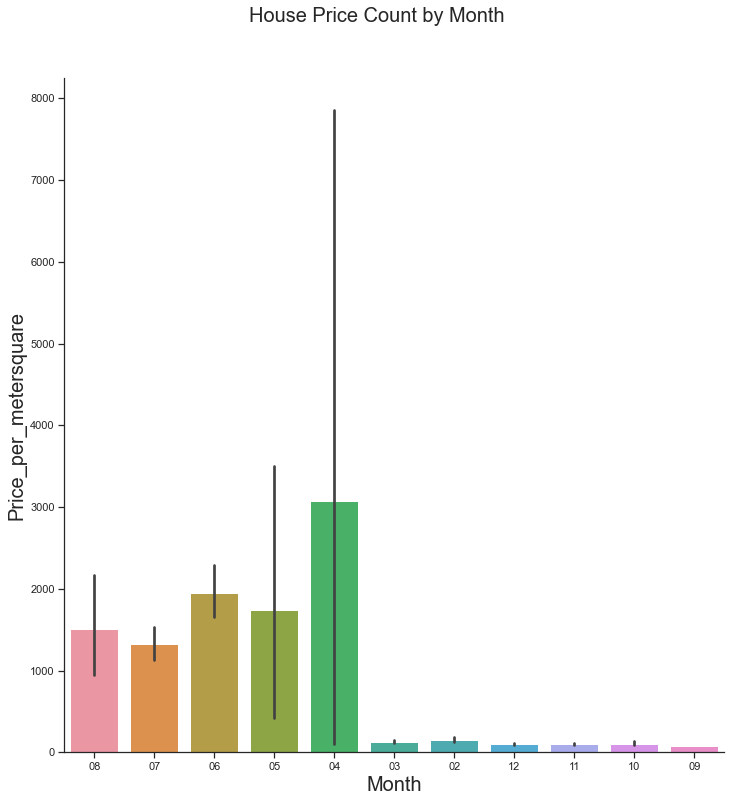

In [28]:
plot = sns.catplot(data=df, kind="bar", x="Month", y="Price_per_metersquare", height = 10)
plot.fig.suptitle("House Price Count by Month", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Month", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

### The Price_per_metersquare of each Housing Type in 2019 and 2020

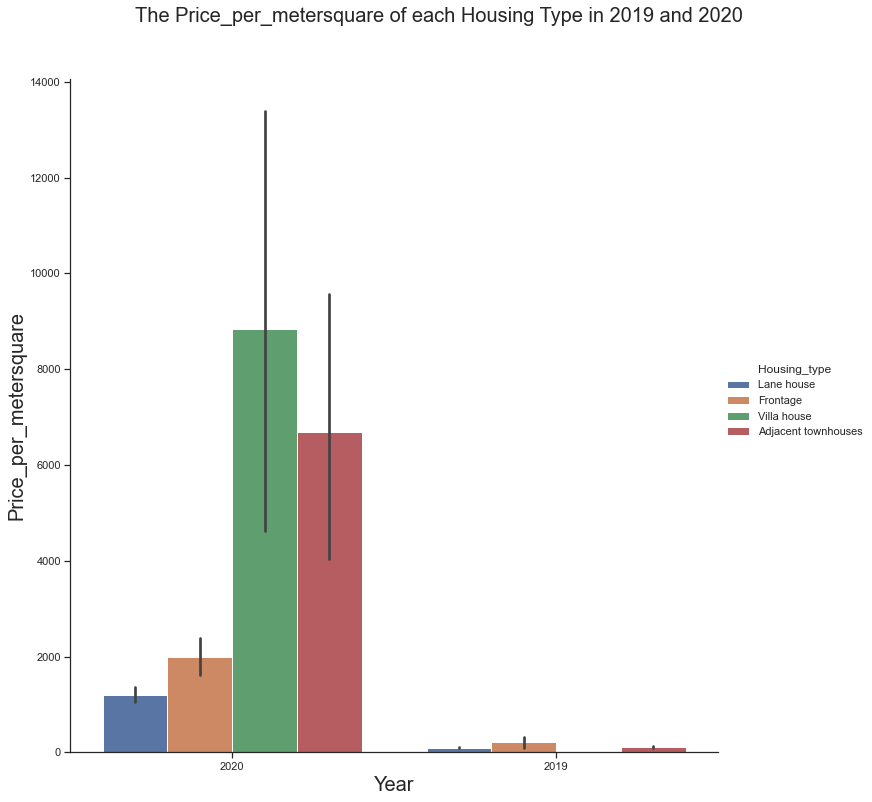

In [29]:
plot = sns.catplot(data=df, kind="bar", x="Year", y="Price_per_metersquare", hue="Housing_type", height = 10)
plot.fig.suptitle("The Price_per_metersquare of each Housing Type in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

### The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020

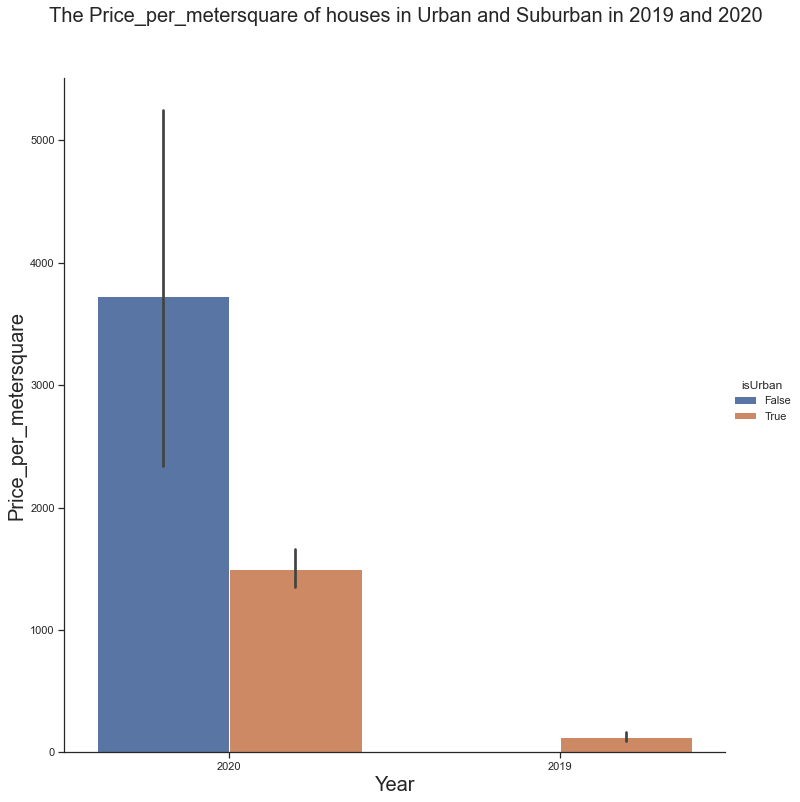

In [30]:
plot = sns.catplot(data=df, kind="bar", x="Year", y="Price_per_metersquare", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in Urban and Suburban in 2019 and 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

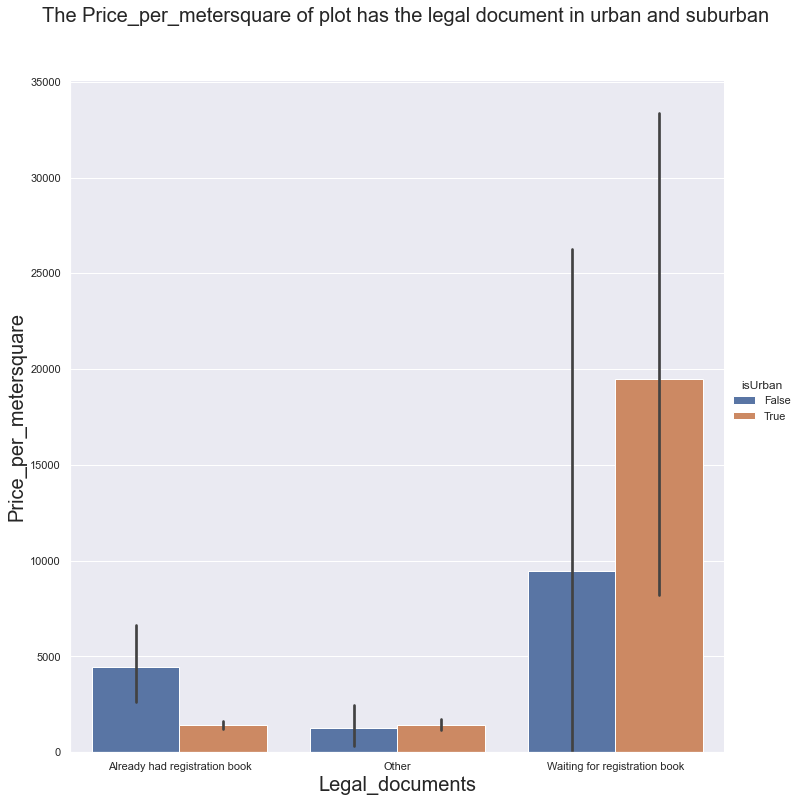

In [38]:
plot = sns.catplot(data=df, kind="bar", x="Legal_documents", y="Price_per_metersquare", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of plot has the legal document in urban and suburban", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Legal_documents", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

The plot already had registration book has higher price -> good point

### The Price_per_metersquare of each housing types in urban and suburban

In [ ]:
plot = sns.catplot(data=df, kind="bar", x="Housing_type", y="Price_per_metersquare", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of each housing types in urban and suburban", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Housing_type", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

### The Price_per_metersquare of housing urban and suburban and the Safety

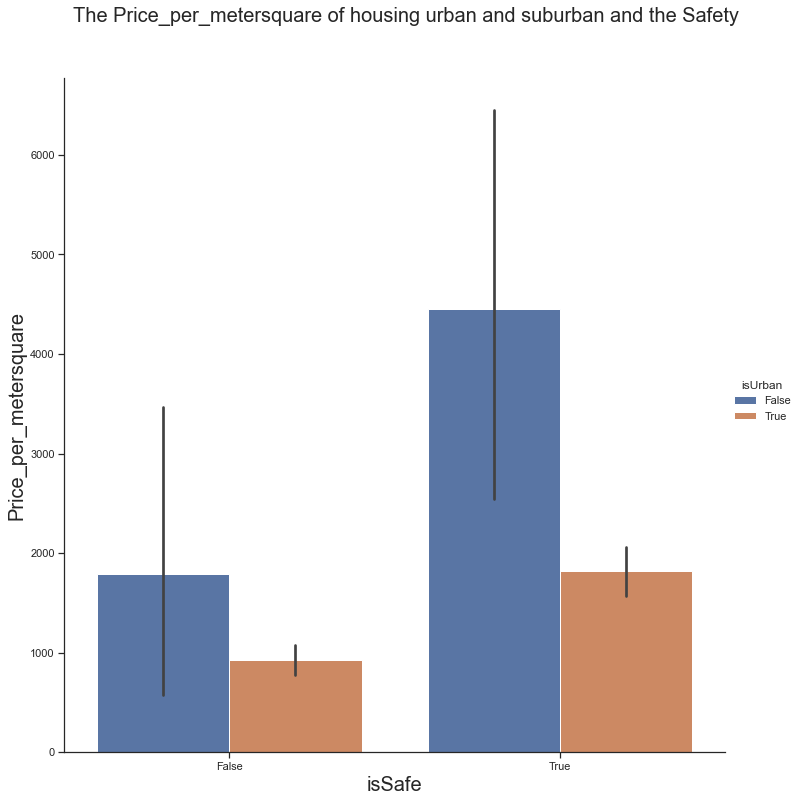

In [32]:
plot = sns.catplot(data=df, kind="bar", x="isSafe", y="Price_per_metersquare", hue="isUrban", height = 10)
plot.fig.suptitle("The Price_per_metersquare of housing urban and suburban and the Safety", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("isSafe", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

Price in Suburban is higher than the Urban, and it is not safe to buy -> Not good idea to buy

## 3b. District
***

### The Price_per_metersquare of houses in some district in urban from 2019 to 2020

In [33]:
urban = ['Dong Da District', 'Thanh Xuan District', 'Hoang Mai District',  'Hai Ba Trung District', 'Ha Dong District',
         'Cau Giay District', 'Ba Dinh District', 'Long Bien District', 'Nam Tu Liem District', 'Tay Ho District',
         'Bac Tu Liem District', 'Hoan Kiem District']

#reconfirm the condition again
urban_price = df[(df['District'].isin(urban))]

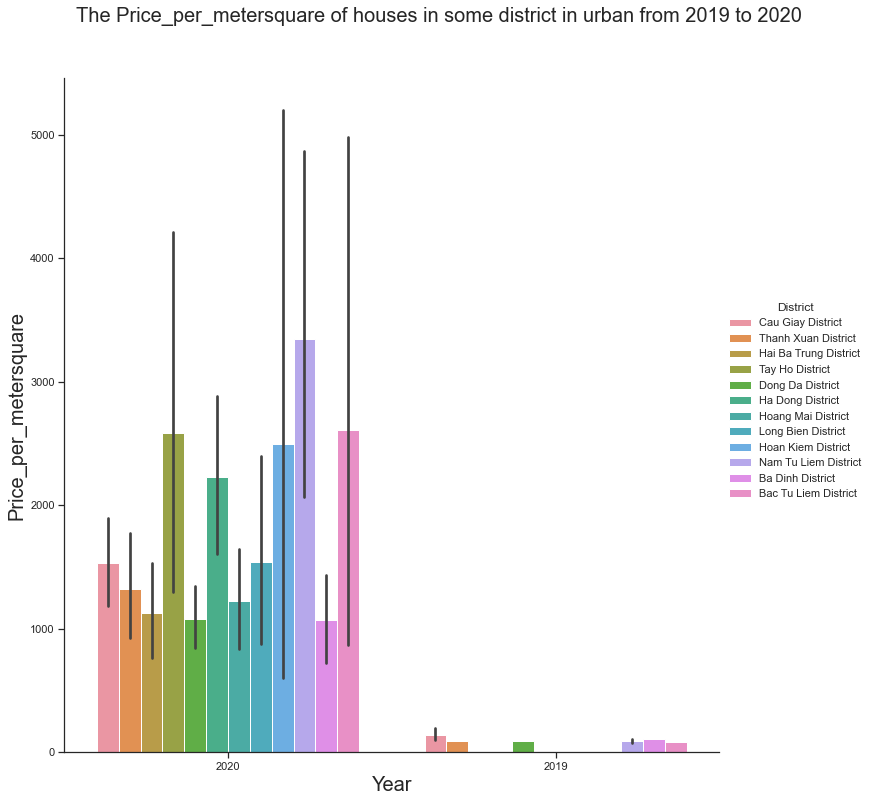

In [34]:
plot = sns.catplot(data=urban_price, kind="bar", x="Year", y="Price_per_metersquare", hue="District", height = 10)
plot.fig.suptitle("The Price_per_metersquare of houses in some district in urban from 2019 to 2020", fontsize=20, 
                  fontdict={"weight": "bold"}, y=1.08)
plot.set_xlabels("Year", fontsize = 20)
plot.set_ylabels("Price_per_metersquare", fontsize = 20)

## 3c. Legal_documents
***

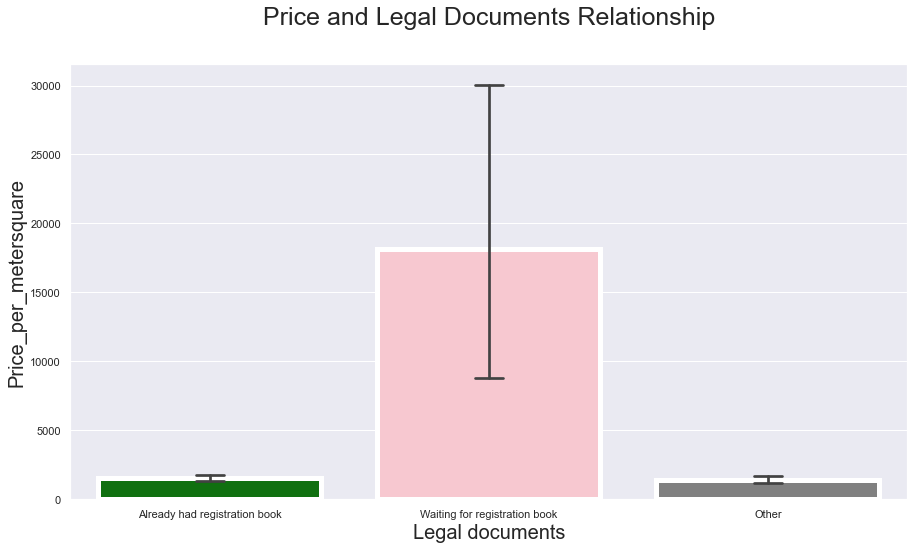

In [35]:
import seaborn as sns
pal = {'Already had registration book':"green", 'Waiting for registration book':"Pink", 'Other' : "gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Legal_documents", 
                 y = "Price_per_metersquare", 
                 data=df, 
                 palette = pal,
                 linewidth=5,
                 order = ['Already had registration book','Waiting for registration book', 'Other'],
                 capsize = .1,
                )

plt.title("Price and Legal Documents Relationship", fontsize = 25,loc = 'center', pad = 40)
plt.xlabel("Legal documents", fontsize = 20)
plt.ylabel("Price_per_metersquare",fontsize = 20);

## 3b. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

In [36]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()


NameError: name 'train' is not defined

In [ ]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 



**Summary**
***
Bla bla bla

## 3c. Fare and Survived
<a id="fare_and_survived"></a>
***

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);



This plot shows something impressive..
- The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
- When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [ ]:
train[train.Fare > 280]

As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now. 

## 3d. Age and Survived
<a id="age_and_survived"></a>
***

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

There is nothing out of the ordinary about this plot, except the very left part of the distribution. This may hint on the posibility that children and infants were the priority. 

## 3e. Combined Feature Relations
<a id='combined_feature_relations'></a>
***
In this section, we are going to discover more than two feature relations in a single graph. I will try my best to illustrate most of the feature relations. Let's get to it. 

In [ ]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Facetgrid is a great way to visualize multiple variables and their relationships at once. From the chart in section 3a we have a intuation that female passengers had better prority than males during the tragedy. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

In [ ]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are **Embarked, Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
* The row represents Embarked(from top to bottom: S, C, Q)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

In [ ]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This facet grid unveils a couple of interesting insights. Let's find out.
* The grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
* Most of the passengers were with in the Fare range of \$100. 

In [ ]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passenger who traveled in big groups with parents/children had less survival rate than other passengers.**

In [ ]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**While, passenger who traveled in small groups with sibilings/spouses had better changes of survivint than other passengers.**

In [ ]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: Statistical Overview
<a id="statisticaloverview"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

**Train info**

In [ ]:
train.describe()

In [ ]:
train.describe(include =['O'])

In [ ]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

In [ ]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

In [ ]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

I have gathered a small summary from the statistical overview above. Let's see what they are...
- This train data set has 891 raw and 9 columns. 
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived. 
- ~63% first class passengers survived, while only 24% lower class passenger survived.



## 4a. Correlation Matrix and Heatmap
<a id="heatmap"></a>
***
### Correlations

In [ ]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

** Sex is the most important correlated feature with *Survived(dependent variable)* feature followed by Pclass.** 

In [ ]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)


**Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.** 

In [ ]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33


**So, Let's analyze these correlations a bit.** We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is. 

## 4b. Statistical Test for Correlation
<a id="statistical_test"></a>
***

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of these methods and see how we are doing with our predictions.

###  Hypothesis Testing Outline

A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.
 
A **hypothesis test** usually consists of multiple parts: 

1. Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analysis. 
2. **The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
> *  An **Alternative hypothesis($H_A$)** is a claim and the opposite of the null hypothesis.  It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
    
3. Determine the **test statistic**: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. [This](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/) article explains it pretty well. [This](https://stattrek.com/hypothesis-test/hypothesis-testing.aspx) article is pretty good as well. 

4. Specify a **Significance level** and **Confidence Interval**: The significance level($\alpha$) is the probability of rejecting a null hypothesis when it is true. In other words, we are ***comfortable/confident*** with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that, Significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%. 

5. Compute the **T-Statistics/Z-Statistics**: Computing the t-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test  

6. Compute the **P-value**: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis is correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this [video](https://www.youtube.com/watch?v=E4KCfcVwzyw) explains the p-value well. **The smaller the P-value, the stronger the evidence against the null hypothesis.**

7. **Describe the result and compare the p-value with the significance value($\alpha$)**: If p<=$\alpha$, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p> $\alpha$, we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing below.

P.S. Khan Academy has a set of videos that I think are intuative and helped me understand conceptually. 

***

### Hypothesis testing for Titanic
#### Formulating a well developed researched question: 
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions. 
> * **Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?**. 
> * **Is there a substantial difference in the survival rate between the male and female passengers?**


#### The Null Hypothesis and The Alternative Hypothesis:
We can formulate our hypothesis by asking questions differently. However, it is essential to understand what our end goal is. Here our dependent variable or target variable is **Survived**. Therefore, we say

> ** Null Hypothesis($H_0$):** There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.  
>  ** Alternative Hypothesis($H_A$):** There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero.


Onc thing we can do is try to set up the Null and Alternative Hypothesis in such way that, when we do our t-test, we can choose to do one tailed test. According to [this](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/) article, one-tailed tests are more powerful than two-tailed test. In addition to that, [this](https://www.youtube.com/watch?v=5NcMFlrnYp8&list=PLIeGtxpvyG-LrjxQ60pxZaimkaKKs0zGF) video is also quite helpful understanding these topics. with this in mind we can update/modify our null and alternative hypothesis. Let's see how we can rewrite this..

> **Null Hypothesis(H0):** male mean is greater or equal to female mean.

> **Alternative Hypothesis(H1):** male mean is less than female mean. 

#### Determine the test statistics:
> This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. 
> Since we do not know the standard deviation($\sigma$) and n is small, we will use the t-distribution. 

#### Specify the significance level:
> Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more in-depth about those in another lesson. For now, we have decided to make our significance level($\alpha$) = 0.05. So, our confidence interval or non-rejection region would be (1 - $\alpha$)=(1-0.05) = 95%. 

#### Computing T-statistics and P-value:
Let's take a random sample and see the difference.

In [ ]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Now, we have to understand that those two means are not  **the population mean ($\bar{\mu}$)**.  *The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks.* For example, To find the age population mean of Bulgaria; we will have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually the distribution start to look more like a **normal distribution**. The more samples we take and the more sample means will be added and, the closer the normal distribution will reach towards population mean. This is where **Central limit theory** comes from. We will go more in depth of this topic later on. 

Going back to our dataset, like we are saying these means above are part of the whole story. We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us at this point to know the population means of survival for male and females. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of male and female from our train data.

In [ ]:
# separating male and female dataframe. 
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

H0: male mean is greater or equal to female mean<br>
H1: male mean is less than female mean. 

According to the samples our male samples ($\bar{x}_m$) and female samples($\bar{x}_f$) mean measured difference is ~ 0.55(statistically this is called the point estimate of the male population mean and female population mean). keeping in mind that...
* We randomly select 50 people to be in the male group and 50 people to be in the female group. 
* We know our sample is selected from a broader population(trainning set). 
* We know we could have totally ended up with a different random sample of males and females.
***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a **t-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).** 



The **t-statistics** is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use [this post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen) as reference to describe the t-statistics here. 


#### Calculating the t-statistics
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

Here..
* $\bar{x}$ is the sample mean. 
* $\mu$ is the hypothesized mean. 
* S is the standard deviation. 
* n is the sample size. 


1. Now, the denominator of this fraction $(\bar{x}-\mu)$ is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger. 

the numerator of this fraction ** ${S}/ {\sqrt{n}}$ ** calculates the amount of variation or noise of the data set. Here S is standard deviation, which tells us how much variation is there in the data. n is the sample size. 

So, according to the explanation above, the t-value or t-statistics is basically measures the strength of the signal(the difference) to the amount of noise(the variation) in the data and that is how we calculate the t-value in one sample t-test. However, in order to calculate between two sample population mean or in our case we will use the follow equation. 

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}}$$

This equation may seem too complex, however, the idea behind these two are similar. Both of them have the concept of signal/noise. The only difference is that we replace our hypothesis mean with another sample mean and the two sample sizes repalce one sample size. 

Here..
* $\bar{x}_M$ is the mean of our male group sample measurements. 
* $ \bar{x}_F$ is the mean of female group samples. 
* $ n_M$ and $n_F$ are the sample number of observations in each group. 
* $ S^2$ is the sample variance.

It is good to have an understanding of what going on in the background. However, we will use **scipy.stats** to find the t-statistics. 


#### Compare P-value with $\alpha$
> It looks like the p-value is very small compared to our significance level($\alpha$)of 0.05. Our observation sample is statistically significant. Therefore, our null hypothesis is ruled out, and our alternative hypothesis is valid, which is "**There is a significant difference in the survival rate between the male and female passengers."**

# Part 5: Feature Engineering
<a id="feature_engineering"></a>
***
Feature Engineering is exactly what its sounds like. Sometimes we want to create extra features from with in the features that we have, sometimes we want to remove features that are alike. Features engineering is the simple word for doing all those. It is important to remember that we will create new features in such ways that will not cause **multicollinearity(when there is a relationship among independent variables)** to occur. 

## name_length
***Creating a new feature "name_length" that will take the count of letters of each name***

In [ ]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## title
**Getting the title of each name as a new feature. **

In [ ]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
## Whenever we split like that, there is a good change that we will end up with while space around our string values. Let's check that. 

In [ ]:
print(train.title.unique())

In [ ]:
## Let's fix that
train.title = train.title.apply(lambda x: x.strip())

In [ ]:
## We can also combile all three lines above for test set here
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

## However it is important to be able to write readable code, and the line above is not so readable. 

In [ ]:
## Let's replace some of the rare values with the keyword 'rare' and other word choice of our own. 
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]


## Now in programming there is a term called DRY(Don't repeat yourself), whenever we are repeating  
## same code over and over again, there should be a light-bulb turning on in our head and make us think
## to code in a way that is not repeating or dull. Let's write a function to do exactly what we 
## did in the code above, only not repeating and more interesting. 

In [ ]:
## we are writing a function that can help us modify title column
def name_converted(feature):
    """
    This function helps modifying the title column
    """
    
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

In [ ]:
print(train.title.unique())
print(test.title.unique())

## family_size
***Creating a new feature called "family_size".*** 

In [ ]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [ ]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [ ]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone

In [ ]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## ticket

In [ ]:
train.Ticket.value_counts().sample(10)

I have yet to figureout how to best manage ticket feature. So, any suggestion would be truly appreciated. For now, I will get rid off the ticket feature.

In [ ]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## calculated_fare

In [ ]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather than the fare of individual passenger, therefore calculated fare will be much handy in this situation. 

## fare_group

In [ ]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

Fare group was calculated based on <i>calculated_fare</i>. This can further help our cause. 

## PassengerId

It seems like <i>PassengerId</i> column only works as an id in this dataset without any significant effect on the dataset. Let's drop it.

In [ ]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
train.head()

## Creating dummy variables

You might be wondering what is a dummy variable? 

Dummy variable is an important **prepocessing machine learning step**. Often times Categorical variables are an important features, which can be the difference between a good model and a great model. While working with a dataset, having meaningful value for example, "male" or "female" instead of 0's and 1's is more intuitive for us. However, machines do not understand the value of categorical values, for example, in this dataset we have gender male or female, algorithms do not accept categorical variables as input. In order to feed data in a machine learning model, we  

In [ ]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [ ]:
train.head()

## age

As I promised before, we are going to use Random forest regressor in this section to predict the missing age values. Let's do it

In [ ]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [ ]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

Let's take a look at the histogram of the age column. 

In [ ]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

## age_group
We can create a new feature by grouping the "Age" column

In [ ]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

<div class="alert alert-danger">
<h1>Need to paraphrase this section</h1>
<h2>Feature Selection</h2>
<h3>Feature selection is an important part of machine learning models. There are many reasons why we use feature selection.</h3> 
<ul>
    <li>Simple models are easier to interpret. People who acts according to model results have a better understanding of the model.</li>
    <li>Shorter training times.</li>
    <li>Enhanced generalisation by reducing overfitting. </li>
    <li>Easier to implement by software developers> model production.</li>
        <ul>
            <li>As Data Scientists we need to remember no to creating models with too many variables since it might overwhelm production engineers.</li>
    </ul>
    <li>Reduced risk of data errors during model use</li>
    <li>Data redundancy</li>
</ul>
</div>

# Part 6: Pre-Modeling Tasks
## 6a. Separating dependent and independent variables
<a id="dependent_independent"></a>
***
Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models. 

In [ ]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

## 6b. Splitting the training data
<a id="split_training_data" ></a>
***
There are multiple ways of splitting data. They are...
* train_test_split.
* cross_validation. 

We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, **X_train**, **X_test**, **y_train**, **y_test**.  
* **X_train** and **y_train** first used to train the algorithm. 
* then, **X_test** is used in that trained algorithms to predict **outcomes. **
* Once we get the **outcomes**, we compare it with **y_test**

By comparing the **outcome** of the model with **y_test**, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix to determine different aspects of model performance.

P.S. When we use cross validation it is important to remember not to use **X_train, X_test, y_train and y_test**, rather we will use **X and y**. I will discuss more on that. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

## 6c. Feature Scaling
<a id="feature_scaling" ></a>
***
Feature scaling is an important concept of machine learning models. Often times a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other ones, its quite a problem. Many machine learning algorithms uses euclidian distances to calculate the distance between two points, it is quite a problem. Let's again look at a the sample of the **train** dataset below.

In [ ]:
train.sample(5)

Here **Age** and **Calculated_fare** is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking **Age** and **Calculated_fare** have higher weight than other features. Therefore, we need to do feature scaling to get a better result. 
There are multiple ways to do feature scaling. 
<ul>
    <li><b>MinMaxScaler</b>-Scales the data using the max and min values so that it fits between 0 and 1.</li>
    <li><b>StandardScaler</b>-Scales the data so that it has mean 0 and variance of 1.</li>
    <li><b>RobustScaler</b>-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.</b>
 </ul>
I will discuss more on that in a different kernel. For now we will use <b>Standard Scaler</b> to feature scale our dataset. 

P.S. I am showing a sample of both before and after so that you can see how scaling changes the dataset. 

<h3><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h3>

In [ ]:
headers = X_train.columns 

X_train.head()

In [ ]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

<h3><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h3>

In [ ]:
pd.DataFrame(X_train, columns=headers).head()

You can see how the features have transformed above.

# Part 7: Modeling the Data
<a id="modelingthedata"></a>
***
In the previous versions of this kernel, I thought about explaining each model before applying it. However, this process makes this kernel too lengthy to sit and read at one go. Therefore I have decided to break this kernel down and explain each algorithm in a different kernel and add the links here. If you like to review logistic regression, please click [here](https://www.kaggle.com/masumrumi/logistic-regression-with-titanic-dataset). 

In [ ]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

<h1><font color="#5831bc" face="Comic Sans MS">Evaluating a classification model</font></h1>

There are multiple ways to evaluate a classification model. 

* Confusion Matrix. 
* ROC Curve
* AUC Curve. 


## Confusion Matrix
<b>Confusion matrix</b>, a table that <b>describes the performance of a classification model</b>. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases. For example, in terms of this dataset, our model is a binary one and we are trying to classify whether the passenger survived or not survived. we have fit the model using **X_train** and **y_train** and predicted the outcome of **X_test** in the variable **y_pred**. So, now we will use a confusion matrix to compare between **y_test** and **y_pred**. Let's do the confusion matrix. 


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

Our **y_test** has a total of 294 data points; part of the original train set that we splitted in order to evaluate our model. Each number here represents certain details about our model. If we were to think about this interms of column and raw, we could see that...

* the first column is of data points that the machine predicted as not-survived.
* the second column is of the statistics that the model predicted as survievd.
* In terms of raws, the first raw indexed as "Not-survived" means that the value in that raw are actual statistics of not survived once. 
* and the "Survived" indexed raw are values that actually survived.

Now you can see that the predicted not-survived and predicted survived sort of overlap with actual survived and actual not-survived. After all it is a matrix and we have some terminologies to call these statistics more specifically. Let's see what they are

<ul style="list-style-type:square;">
    <li><b>True Positive(TP)</b>: values that the model predicted as yes(survived) and is actually yes(survived).</li>
    <li><b>True Negative(TN)</b>: values that model predicted as no(not-survived) and is actually no(not-survived)</li>
    <li><b>False Positive(or Type I error)</b>: values that model predicted as yes(survived) but actually no(not-survived)</li>
    <li><b>False Negative(or Type II error)</b>: values that model predicted as no(not-survived) but actually yes(survived)</li>
</ul>

For this dataset, whenever the model is predicting something as yes, it means the model is predicting that the passenger survived and for cases when the model predicting no; it means the passenger did not survive. Let's determine the value of all these terminologies above.
<ul style="list-style-type:square;">
    <li><b>True Positive(TP):87</b></li>
    <li><b>True Negative(TN):149</b></li>
    <li><b>False Positive(FP):28</b></li>
    <li><b>False Negative(FN):30</b></li>
</ul>
From these four terminologies, we can compute many other rates that are used to evaluate a binary classifier. 


#### Accuracy: 
** Accuracy is the measure of how often the model is correct.** 
* (TP + TN)/total = (87+149)/294 = .8027

We can also calculate accuracy score using scikit learn. 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

**Misclassification Rate:** Misclassification Rate is the measure of how often the model is wrong**
* Misclassification Rate and Accuracy are opposite of each other.
* Missclassification is equivalent to 1 minus Accuracy. 
* Misclassification Rate is also known as "Error Rate".

> (FP + FN)/Total = (28+30)/294 = 0.19

**True Positive Rate/Recall/Sensitivity:** How often the model predicts yes(survived) when it's actually yes(survived)?
> TP/(TP+FN) = 87/(87+30) = 0.7435897435897436


In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


**False Positive Rate:** How often the model predicts yes(survived) when it's actually no(not-survived)?
> FP/(FP+TN) = 28/(28+149) = 0.15819209039548024

**True Negative Rate/Specificity:** How often the model predicts no(not-survived) when it's actually no(not-survived)?
* True Negative Rate is equivalent to 1 minus False Positive Rate.

> TN/(TN+FP) = 149/(149+28) = 0.8418079096045198

**Precision:** How often is it correct when the model predicts yes. 
> TP/(TP+FP) = 87/(87+28) = 0.7565217391304347

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

we have our confusion matrix. How about we give it a little more character. 

In [ ]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<h1>AUC & ROC Curve</h1>

In [ ]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Using Cross-validation:
Pros: 
* Helps reduce variance. 
* Expends models predictability. 


In [ ]:
sc = st_scale

In [ ]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

## Grid Search on Logistic Regression
* What is grid search? 
* What are the pros and cons?

**Gridsearch** is a simple concept but effective technique in Machine Learning. The word **GridSearch** stands for the fact that we are searching for optimal parameter/parameters over a "grid." These optimal parameters are also known as **Hyperparameters**. **The Hyperparameters are model parameters that are set before fitting the model and determine the behavior of the model.**. For example, when we choose to use linear regression, we may decide to add a penalty to the loss function such as Ridge or Lasso. These penalties require specific alpha (the strength of the regularization technique) to set beforehand. The higher the value of alpha, the more penalty is being added. GridSearch finds the optimal value of alpha among a range of values provided by us, and then we go on and use that optimal value to fit the model and get sweet results. It is essential to understand those model parameters are different from models outcomes, for example, **coefficients** or model evaluation metrics such as **accuracy score** or **mean squared error** are model outcomes and different than hyperparameters.

#### This part of the kernel is a working progress. Please check back again for future updates.####

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

In [ ]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)


#### Using the best parameters from the grid-search. 

In [ ]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

 #### This part of the kernel is a working progress. Please check back again for future updates.####
 
 Resources: 
 * [Confusion Matrix](https://www.youtube.com/watch?v=8Oog7TXHvFY)
### Under-fitting & Over-fitting: 
So, we have our first model and its score. But, how do we make sure that our model is performing well. Our model may be overfitting or underfitting. In fact, for those of you don't know what overfitting and underfitting is, Let's find out.

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

As you see in the chart above. **Underfitting** is when the model fails to capture important aspects of the data and therefore introduces more bias and performs poorly. On the other hand, **Overfitting** is when the model performs too well on the training data but does poorly in the validation set or test sets.  This situation is also known as having less bias but more variation and perform poorly as well. Ideally, we want to configure a model that performs well not only in the training data but also in the test data. This is where **bias-variance tradeoff** comes in. When we have a model that overfits, meaning less biased and more of variance, we introduce some bias in exchange of having much less variance. One particular tactic for this task is regularization models (Ridge, Lasso, Elastic Net).  These models are built to deal with the bias-variance tradeoff. This [kernel](https://www.kaggle.com/dansbecker/underfitting-and-overfitting) explains this topic well. Also, the following chart gives us a mental picture of where we want our models to be. 
![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Ideally, we want to pick a sweet spot where the model performs well in training set, validation set, and test set. As the model gets complex, bias decreases, variance increases. However, the most critical part is the error rates. We want our models to be at the bottom of that **U** shape where the error rate is the least. That sweet spot is also known as **Optimum Model Complexity(OMC).**

Now that we know what we want in terms of under-fitting and over-fitting, let's talk about how to combat them. 

How to combat over-fitting?
<ul>
    <li>Simplify the model by using less parameters.</li>
    <li>Simplify the model by changing the hyperparameters.</li>
    <li>Introducing regularization models. </li>
    <li>Use more training data. </li>
    <li>Gatter more data ( and gather better quality data). </li>
    </ul>
 #### This part of the kernel is a working progress. Please check back again for future updates.####

## 7b. K-Nearest Neighbor classifier(KNN)
<a id="knn"></a>
***

In [ ]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

#### Manually find the best possible k value for KNN

In [ ]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))


In [ ]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Grid search on KNN classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#### Using best estimator from grid search using KNN. 

In [ ]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

#### Using RandomizedSearchCV
Randomized search is a close cousin of grid search. It doesn't  always provide the best result but its fast. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

In [ ]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

## Gaussian Naive Bayes
<a id="gaussian_naive"></a>
***

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

## Support Vector Machines(SVM)
<a id="svm"></a>
***

In [ ]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

## Decision Tree Classifier

Decision tree works by breaking down the dataset into small subsets. This breaking down process is done by asking questions about the features of the datasets. The idea is to unmix the labels by asking fewer questions necessary. As we ask questions, we are breaking down the dataset into more subsets. Once we have a subgroup with only the unique type of labels, we end the tree in that node. If you would like to get a detailed understanding of Decision tree classifier, please take a look at [this](https://www.kaggle.com/masumrumi/decision-tree-with-titanic-dataset) kernel. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

In [ ]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

In [ ]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

 <h4> Let's look at the feature importance from decision tree grid.</h4>

In [ ]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

These are the top 10 features determined by **Decision Tree** helped classifing the fates of many passenger on Titanic on that night.

## 7f. Random Forest Classifier
<a id="random_forest"></a>

I admire working with decision trees because of the potential and basics they provide towards building a more complex model like Random Forest(RF). RF is an ensemble method (combination of many decision trees) which is where the "forest" part comes in. One crucial details about Random Forest is that while using a forest of decision trees, RF model <b>takes random subsets of the original dataset(bootstrapped)</b> and <b>random subsets of the variables(features/columns)</b>. Using this method, the RF model creates 100's-1000's(the amount can be menually determined) of a wide variety of decision trees. This variety makes the RF model more effective and accurate. We then run each test data point through all of these 100's to 1000's of decision trees or the RF model and take a vote on the output. 



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

In [ ]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

## Feature Importance

In [ ]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

<h3>Why Random Forest?(Pros and Cons)</h3>

***
<h2>Introducing Ensemble Learning</h2>
In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

There are two types of ensemple learnings. 

**Bagging/Averaging Methods**
> In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

**Boosting Methods**
> The other family of ensemble methods are boosting methods, where base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

<h4 align="right">Source:GA</h4>

Resource: <a href="https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205">Ensemble methods: bagging, boosting and stacking</a>
***
## 7g. Bagging Classifier
<a id="bagging"></a>
***

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">Bagging Classifier</a>(Bootstrap Aggregating) is the ensemble method that involves manipulating the training set by resampling and running algorithms on it. Let's do a quick review:
* Bagging classifier uses a process called bootstrapped dataset to create multiple datasets from one original dataset and runs algorithm on each one of them. Here is an image to show how bootstrapped dataset works. 
<img src="https://uc-r.github.io/public/images/analytics/bootstrap/bootstrap.png" width="600">
<h4 align="center">Resampling from original dataset to bootstrapped datasets</h4>
<h4 align="right">Source: https://uc-r.github.io</h4>


* After running a learning algorithm on each one of the bootstrapped datasets, all models are combined by taking their average. the test data/new data then go through this averaged classifier/combined classifier and predict the output. 

Here is an image to make it clear on how bagging works, 
<img src="https://prachimjoshi.files.wordpress.com/2015/07/screen_shot_2010-12-03_at_5-46-21_pm.png" width="600">
<h4 align="right">Source: https://prachimjoshi.files.wordpress.com</h4>
Please check out [this](https://www.kaggle.com/masumrumi/bagging-with-titanic-dataset) kernel if you want to find out more about bagging classifier. 

In [ ]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

<h3>Why use Bagging? (Pros and cons)</h3>
Bagging works best with strong and complex models(for example, fully developed decision trees). However, don't let that fool you to thinking that similar to a decision tree, bagging also overfits the model. Instead, bagging reduces overfitting since a lot of the sample training data are repeated and used to create base estimators. With a lot of equally likely training data, bagging is not very susceptible to overfitting with noisy data, therefore reduces variance. However, the downside is that this leads to an increase in bias.

<h4>Random Forest VS. Bagging Classifier</h4>

If some of you are like me, you may find Random Forest to be similar to Bagging Classifier. However, there is a fundamental difference between these two which is **Random Forests ability to pick subsets of features in each node.** I will elaborate on this in a future update.

## 7h. AdaBoost Classifier
<a id="AdaBoost"></a>
***
AdaBoost is another <b>ensemble model</b> and is quite different than Bagging. Let's point out the core concepts. 
> AdaBoost combines a lot of "weak learners"(they are also called stump; a tree with only one node and two leaves) to make classifications.

> This base model fitting is an iterative process where each stump is chained one after the other; <b>It cannot run in parallel.</b>

> <b>Some stumps get more say in the final classifications than others.</b> The models use weights that are assigned to each data point/raw indicating their "importance." Samples with higher weight have a higher influence on the total error of the next model and gets more priority. The first stump starts with uniformly distributed weight which means, in the beginning, every datapoint have an equal amount of weights. 

> <b>Each stump is made by talking the previous stump's mistakes into account.</b> After each iteration weights gets re-calculated in order to take the errors/misclassifications from the last stump into consideration. 

> The final prediction is typically constructed by a weighted vote where weights for each base model depends on their training errors or misclassification rates. 

To illustrate what we have talked about so far let's look at the following visualization. 

<img src="https://cdn-images-1.medium.com/max/1600/0*paPv7vXuq4eBHZY7.png">
<h5 align="right"> Source: Diogo(Medium)</h5>




Let's dive into each one of the nitty-gritty stuff about AdaBoost:
***
> <b>First</b>, we determine the best feature to split the dataset using Gini index(basics from decision tree). The feature with the lowest Gini index becomes the first stump in the AdaBoost stump chain(the lower the Gini index is, the better unmixed the label is, therefore, better split).
***
> <b>Secondly</b>, we need to determine how much say a stump will have in the final classification and how we can calculate that.
* We learn how much say a stump has in the final classification by calculating how well it classified the samples (aka calculate the total error of the weight).
* The <b>Total Error</b> for a stump is the sum of the weights associated with the incorrectly classified samples. For example, lets say, we start a stump with 10 datasets. The first stump will uniformly distribute an weight amoung all the datapoints. Which means each data point will have 1/10 weight. Let's say once the weight is distributed we run the model and find 2 incorrect predicitons. In order to calculate the total erorr we add up all the misclassified weights. Here we get 1/10 + 1/10 = 2/10 or 1/5. This is our total error. We can also think about it


$$ \epsilon_t = \frac{\text{misclassifications}_t}{\text{observations}_t} $$


* Since the weight is uniformly distributed(all add up to 1) among all data points, the total error will always be between 0(perfect stump) and 1(horrible stump).
* We use the total error to determine the amount of say a stump has in the final classification using the following formula
 

$$ \alpha_t = \frac{1}{2}ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{where } \epsilon_t < 1$$


Where $\epsilon_t$ is the misclassification rate for the current classifier:


$$ \epsilon_t = \frac{\text{misclassifications}_t}{\text{observations}_t} $$


Here...
* $\alpha_t$ = Amount of Say
* $\epsilon_t$ = Total error



We can draw a graph to determine the amount of say using the value of total error(0 to 1)

<img src="http://chrisjmccormick.files.wordpress.com/2013/12/adaboost_alphacurve.png">
<h5 align="right"> Source: Chris McCormick</h5>

* The blue line tells us the amount of say for <b>Total Error(Error rate)</b> between 0 and 1. 
* When the stump does a reasonably good job, and the <b>total error</b> is minimal, then the <b>amount of say(Alpha)</b> is relatively large, and the alpha value is positive. 
* When the stump does an average job(similar to a coin flip/the ratio of getting correct and incorrect ~50%/50%), then the <b>total error</b> is ~0.5. In this case the <b>amount of say</b> is <b>0</b>.
* When the error rate is high let's say close to 1, then the <b>amount of say</b> will be negative, which means if the stump outputs a value as "survived" the included weight will turn that value into "not survived."

P.S. If the <b>Total Error</b> is 1 or 0, then this equation will freak out. A small amount of error is added to prevent this from happening. 
 
 ***
> <b>Third</b>, We need to learn how to modify the weights so that the next stump will take the errors that the current stump made into account. The pseducode for calculating the new sample weight is as follows. 


$$ New Sample Weight = Sample Weight + e^{\alpha_t}$$

Here the $\alpha_t(AmountOfSay)$ can be positive or negative depending whether the sample was correctly classified or misclassified by the current stump. We want to increase the sample weight of the misclassified samples; hinting the next stump to put more emphasize on those. Inversely, we want to decrease the sample weight of the correctly classified samples; hinting the next stump to put less emphasize on those. 

The following equation help us to do this calculation. 

$$ D_{t+1}(i) = D_t(i) e^{-\alpha_t y_i h_t(x_i)} $$

Here, 
* $D_{t+1}(i)$ = New Sample Weight. 
* $D_t(i)$ = Current Sample weight.
* $\alpha_t$ = Amount of Say, alpha value, this is the coefficient that gets updated in each iteration and 
* $y_i h_t(x_i)$ = place holder for 1 if stump correctly classified, -1 if misclassified. 

Finally, we put together the combined classifier, which is 

$$ AdaBoost(X) = sign\left(\sum_{t=1}^T\alpha_t h_t(X)\right) $$ 

Here, 

$AdaBoost(X)$ is the classification predictions for $y$ using predictor matrix $X$

$T$ is the set of "weak learners"

$\alpha_t$ is the contribution weight for weak learner $t$

$h_t(X)$ is the prediction of weak learner $t$

and $y$ is binary **with values -1 and 1**


P.S. Since the stump barely captures essential specs about the dataset, the model is highly biased in the beginning. However, as the chain of stumps continues and at the end of the process, AdaBoost becomes a strong tree and reduces both bias and variance.

<h3>Resources:</h3>
<ul>
    <li><a href="https://www.youtube.com/watch?v=LsK-xG1cLYA">Statquest</a></li>
    <li><a href="https://www.youtube.com/watch?v=-DUxtdeCiB4">Principles of Machine Learning | AdaBoost(Video)</a></li>
</ul>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

## Pros and cons of boosting

---

### Pros

- Achieves higher performance than bagging when hyper-parameters tuned properly.
- Can be used for classification and regression equally well.
- Easily handles mixed data types.
- Can use "robust" loss functions that make the model resistant to outliers.

---

### Cons

- Difficult and time consuming to properly tune hyper-parameters.
- Cannot be parallelized like bagging (bad scalability when huge amounts of data).
- More risk of overfitting compared to bagging.

<h3>Resources: </h3>
<ul>
    <li><a href="http://mccormickml.com/2013/12/13/adaboost-tutorial/">AdaBoost Tutorial-Chris McCormick</a></li>
    <li><a href="http://rob.schapire.net/papers/explaining-adaboost.pdf">Explaining AdaBoost by Robert Schapire(One of the original author of AdaBoost)</a></li>
</ul>

## 7i. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

<div class=" alert alert-info">
<h3>Resources: </h3>
<ul>
    <li><a href="https://www.youtube.com/watch?v=sDv4f4s2SB8">Gradient Descent(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=3CC4N4z3GJc">Gradient Boost(Regression Main Ideas)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=3CC4N4z3GJc">Gradient Boost(Regression Calculation)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=jxuNLH5dXCs">Gradient Boost(Classification Main Ideas)(StatQuest)</a></li>
    <li><a href="https://www.youtube.com/watch?v=StWY5QWMXCw">Gradient Boost(Classification Calculation)(StatQuest)</a></li>
    <li><a href="https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/">Complete Machine Learning Guide to Parameter Tuning in Gradient Boosting (GBM) in Python</a></li>
</ul>
</div>

## 7j. XGBClassifier
<a id="XGBClassifier"></a>
***

In [ ]:
# from xgboost import XGBClassifier
# XGBClassifier = XGBClassifier()
# XGBClassifier.fit(X, y)
# y_pred = XGBClassifier.predict(X_test)
# XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
# print(XGBClassifier_accy)

## 7k. Extra Trees Classifier
<a id="extra_tree"></a>
***

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

## 7l. Gaussian Process Classifier
<a id="GaussianProcessClassifier"></a>
***

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

## 7m. Voting Classifier
<a id="voting_classifer"></a>
***

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
#     ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='hard')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

In [ ]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

In [ ]:
#models = pd.DataFrame({
#    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#              'Random Forest', 'Naive Bayes', 
#              'Decision Tree', 'Gradient Boosting Classifier', 'Voting Classifier', 'XGB Classifier','ExtraTrees Classifier','Bagging Classifier'],
#    'Score': [svc_accy, knn_accy, logreg_accy, 
#              random_accy, gaussian_accy, dectree_accy,
#               gradient_accy, voting_accy, XGBClassifier_accy, extraTree_accy, bagging_accy]})
#models.sort_values(by='Score', ascending=False)

# Part 8: Submit test predictions
<a id="submit_predictions"></a>
***

In [ ]:
all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b
    


In [ ]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

<div class="alert alert-info">
    <h1>Resources</h1>
    <ul>
        <li><b>Statistics</b></li>
        <ul>
            <li><a href="https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php">Types of Standard Deviation</a></li>
            <li><a href="https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen">What Is a t-test? And Why Is It Like Telling a Kid to Clean Up that Mess in the Kitchen?</a></li>
            <li><a href="https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics">What Are T Values and P Values in Statistics?</a></li>
            <li><a href="https://www.youtube.com/watch?v=E4KCfcVwzyw">What is p-value? How we decide on our confidence level.</a></li>
        </ul>
        <li><b>Writing pythonic code</b></li>
        <ul>
            <li><a href="https://www.kaggle.com/rtatman/six-steps-to-more-professional-data-science-code">Six steps to more professional data science code</a></li>
            <li><a href="https://www.kaggle.com/jpmiller/creating-a-good-analytics-report">Creating a Good Analytics Report</a></li>
            <li><a href="https://en.wikipedia.org/wiki/Code_smell">Code Smell</a></li>
            <li><a href="https://www.python.org/dev/peps/pep-0008/">Python style guides</a></li>
            <li><a href="https://gist.github.com/sloria/7001839">The Best of the Best Practices(BOBP) Guide for Python</a></li>
            <li><a href="https://www.python.org/dev/peps/pep-0020/">PEP 20 -- The Zen of Python</a></li>
            <li><a href="https://docs.python-guide.org/">The Hitchiker's Guide to Python</a></li>
            <li><a href="https://realpython.com/tutorials/best-practices/">Python Best Practice Patterns</a></li>
            <li><a href="http://www.nilunder.com/blog/2013/08/03/pythonic-sensibilities/">Pythonic Sensibilities</a></li>
        </ul>
        <li><b>Why Scikit-Learn?</b></li>
        <ul>
            <li><a href="https://www.oreilly.com/content/intro-to-scikit-learn/">Introduction to Scikit-Learn</a></li>
            <li><a href="https://www.oreilly.com/content/six-reasons-why-i-recommend-scikit-learn/">Six reasons why I recommend scikit-learn</a></li>
            <li><a href="https://hub.packtpub.com/learn-scikit-learn/">Why you should learn Scikit-learn</a></li>
            <li><a href="https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines">A Deep Dive Into Sklearn Pipelines</a></li>
            <li><a href="https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial">Sklearn pipelines tutorial</a></li>
            <li><a href="https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html">Managing Machine Learning workflows with Sklearn pipelines</a></li>
            <li><a href="https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976">A simple example of pipeline in Machine Learning using SKlearn</a></li>
        </ul>
    </ul>
    <h1>Credits</h1>
    <ul>
        <li>To Brandon Foltz for his <a href="https://www.youtube.com/channel/UCFrjdcImgcQVyFbK04MBEhA">youtube</a> channel and for being an amazing teacher.</li>
        <li>To GA where I started my data science journey.</li>
        <li>To Kaggle community for inspiring me over and over again with all the resources I need.</li>
        <li>To Udemy Course "Deployment of Machine Learning". I have used and modified some of the code from this course to help making the learning process intuitive.</li>
    </ul>
</div>

<div class="alert alert-info">
<h4>If you like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:</h4>
    <ul>
        <li><a href="https://www.linkedin.com/in/masumrumi/"><b>LinkedIn</b></a></li>
        <li><a href="https://github.com/masumrumi"><b>Github</b></a></li>
        <li><a href="http://masumrumi.com/"><b>masumrumi.com</b></a></li>
    </ul>

<p>This kernel will always be a work in progress. I will incorporate new concepts of data science as I comprehend them with each update. If you have any idea/suggestions about this notebook, please let me know. Any feedback about further improvements would be genuinely appreciated.</p>

<h1>If you have come this far, Congratulations!!</h1>

<h1>If this notebook helped you in any way or you liked it, please upvote and/or leave a comment!! :)</h1></div>